Epoch 1/100
2/2 [==============================] - 28s 10s/step - loss: 39.5346 - val_loss: 2.3659
Epoch 2/100
2/2 [==============================] - 26s 10s/step - loss: 2.2715 - val_loss: 0.7515
Epoch 3/100
2/2 [==============================] - 26s 8s/step - loss: 0.6748 - val_loss: 0.3803
Epoch 4/100
2/2 [==============================] - 26s 8s/step - loss: 0.3562 - val_loss: 0.2471
Epoch 5/100
2/2 [==============================] - 26s 9s/step - loss: 0.2313 - val_loss: 0.1314
Epoch 6/100
2/2 [==============================] - 26s 10s/step - loss: 0.1220 - val_loss: 0.0612
Epoch 7/100
2/2 [==============================] - 26s 10s/step - loss: 0.0628 - val_loss: 0.0570
Epoch 8/100
2/2 [==============================] - 25s 8s/step - loss: 0.0561 - val_loss: 0.0409
Epoch 9/100
2/2 [==============================] - 26s 9s/step - loss: 0.0387 - val_loss: 0.0520
Epoch 10/100
2/2 [==============================] - 26s 9s/step - loss: 0.0461 - val_loss: 0.0451
Epoch 11/100
2/2 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step


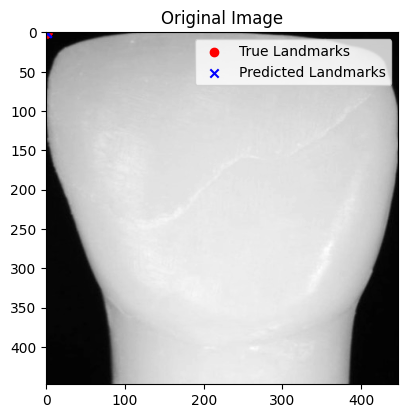

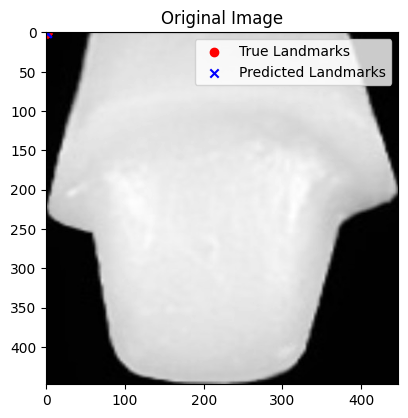

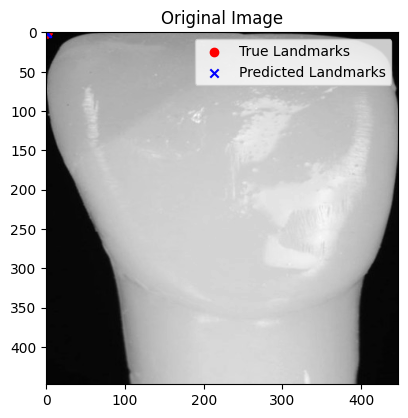

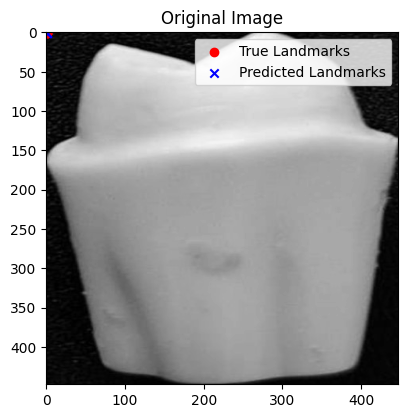

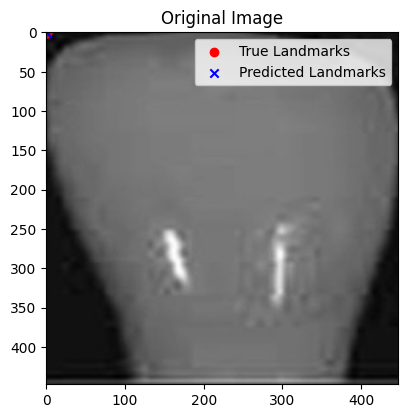

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def extract_landmarks(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    landmarks = []

    for obj in root.findall('object'):
        name = obj.find('name').text

        # Fix the bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Ensure non-zero width and height for the bounding box
        if xmin == xmax:
            xmax += 1

        if ymin == ymax:
            ymax += 1

        cx = (xmin + xmax) / 2
        cy = (ymin + ymax) / 2

        landmarks.append([cx, cy])

    landmarks = np.array(landmarks)
    return landmarks

def load_data(image_dir, annotation_dir):
    images = []
    landmarks = []

    for i in range(48):
        img_path = image_dir + str(i) + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        xml_path = annotation_dir + str(i) + '.xml'
        landmarks.append(extract_landmarks(xml_path))

        images.append(img)

    images = np.array(images)
    landmarks = np.array(landmarks)
    return images, landmarks

def preprocess_data(images, landmarks):
    images = (images - np.min(images)) / (np.max(images) - np.min(images))
    landmarks = landmarks / np.array([[448, 448]])
    landmarks = landmarks.transpose((0, 2, 1))
    return images, landmarks

def create_model(num_landmarks):
    inputs = tf.keras.layers.Input(shape=(448, 448, 1))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    outputs = tf.keras.layers.Dense(2 * num_landmarks, activation='linear')(x)
    outputs = tf.keras.layers.Reshape((2, num_landmarks))(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

def visualize_results(images, true_landmarks, predicted_landmarks, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(10, 5))

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        # Display the true landmarks
        plt.scatter(true_landmarks[i][0, :], true_landmarks[i][1, :], c='r', marker='o', label='True Landmarks')

        # Display the predicted landmarks
        plt.scatter(predicted_landmarks[i][0, :], predicted_landmarks[i][1, :], c='b', marker='x', label='Predicted Landmarks')

        plt.legend()
        plt.show()

def main():
    image_dir = '/home/est/est/'
    annotation_dir = '/home/est/est/'

    images, landmarks = load_data(image_dir, annotation_dir)
    images, landmarks = preprocess_data(images, landmarks)

    # Set the correct number of landmarks
    num_landmarks = landmarks.shape[2]

    train_images, test_images, train_landmarks, test_landmarks = train_test_split(images, landmarks, test_size=0.2, random_state=42)

    model = create_model(num_landmarks)

    history = model.fit(train_images, train_landmarks, epochs=100, batch_size=32, validation_data=(test_images, test_landmarks))

    model.save('landmark_detection_model.h5')
    # Make predictions on test images
    predicted_landmarks = model.predict(test_images)

    # Visualize the results
    visualize_results(test_images, test_landmarks, predicted_landmarks)



if __name__ == '__main__':
    main()

1/1 [==============================] - 0s 367ms/step


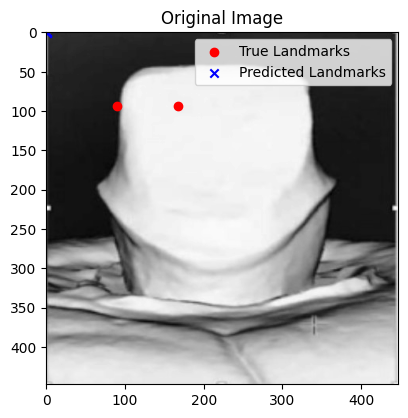

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def extract_landmarks(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    landmarks = []

    for obj in root.findall('object'):
        name = obj.find('name').text

        # Fix the bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Ensure non-zero width and height for the bounding box
        if xmin == xmax:
            xmax += 1

        if ymin == ymax:
            ymax += 1

        cx = (xmin + xmax) / 2
        cy = (ymin + ymax) / 2

        landmarks.append([cx, cy])

    landmarks = np.array(landmarks)
    return landmarks

def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

def visualize_result(image, true_landmarks, predicted_landmarks):
    plt.figure(figsize=(10, 5))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title('Original Image')

    # Display the true landmarks
    plt.scatter(true_landmarks[0, :], true_landmarks[1, :], c='r', marker='o', label='True Landmarks')

    # Display the predicted landmarks
    plt.scatter(predicted_landmarks[0, 0, :], predicted_landmarks[0, 1, :], c='b', marker='x', label='Predicted Landmarks')

    plt.legend()
    plt.show()



def main():
    # Load the saved model
    model = tf.keras.models.load_model('landmark_detection_model.h5')

    # Load and preprocess a new image for inference
    new_image_path = '/home/est/est/1.jpg'
    new_image = load_and_preprocess_image(new_image_path)

    # Perform inference
    predicted_landmarks = model.predict(new_image)

    # Load the corresponding XML file for true landmarks
    true_landmarks = extract_landmarks('/home/est/est/1.xml')

    # Visualize the result
    visualize_result(new_image, true_landmarks, predicted_landmarks)

if __name__ == '__main__':
    main()


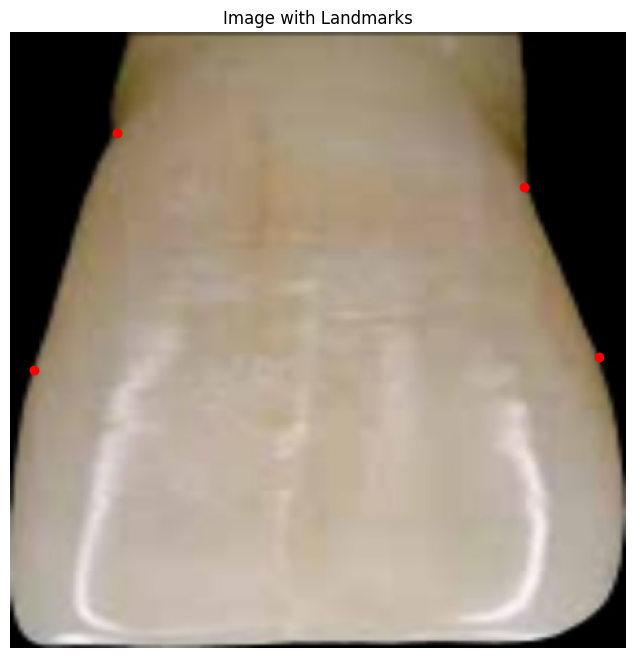

In [ ]:
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

def extract_landmarks(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    landmarks = []

    for obj in root.findall('object'):
        name = obj.find('name').text

        # Extract bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Compute the center coordinates of the bounding box
        cx = (xmin + xmax) / 2
        cy = (ymin + ymax) / 2

        # Normalize to range [-1, 1]
        normalized_cx = (2 * cx / 448) - 1
        normalized_cy = (2 * cy / 448) - 1

        landmarks.append([normalized_cx, normalized_cy])

    return landmarks

def visualize_image_with_landmarks(image_path, landmarks):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)

    for landmark in landmarks:
        x, y = landmark
        x = (x + 1) * 448 / 2  # Denormalize to image dimensions
        y = (y + 1) * 448 / 2
        plt.scatter(x, y, c='r', marker='o')

    plt.title('Image with Landmarks')
    plt.axis('off')
    plt.show()

def main():
    xml_path = '/home/est/est/0.xml'
    image_path = '/home/est/est/0.jpg'

    landmarks = extract_landmarks(xml_path)
    visualize_image_with_landmarks(image_path, landmarks)

if __name__ == '__main__':
    main()


Epoch 1/100
2/2 [==============================] - 3s 239ms/step - loss: 0.2500 - val_loss: 0.2489
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 0.2488 - val_loss: 0.2476
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2475 - val_loss: 0.2463
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.2462 - val_loss: 0.2448
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 0.2447 - val_loss: 0.2432
Epoch 6/100
2/2 [==============================] - 0s 56ms/step - loss: 0.2431 - val_loss: 0.2415
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 0.2414 - val_loss: 0.2396
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.2395 - val_loss: 0.2376
Epoch 9/100
2/2 [==============================] - 0s 39ms/step - loss: 0.2375 - val_loss: 0.2354
Epoch 10/100
2/2 [==============================] - 0s 50ms/step - loss: 0.2353 - val_loss: 0.2330
Epoch 11/100
2/2 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 168ms/step


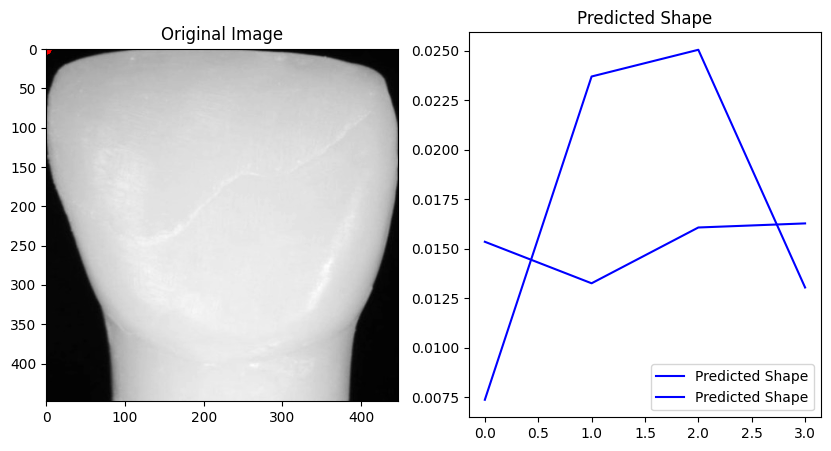

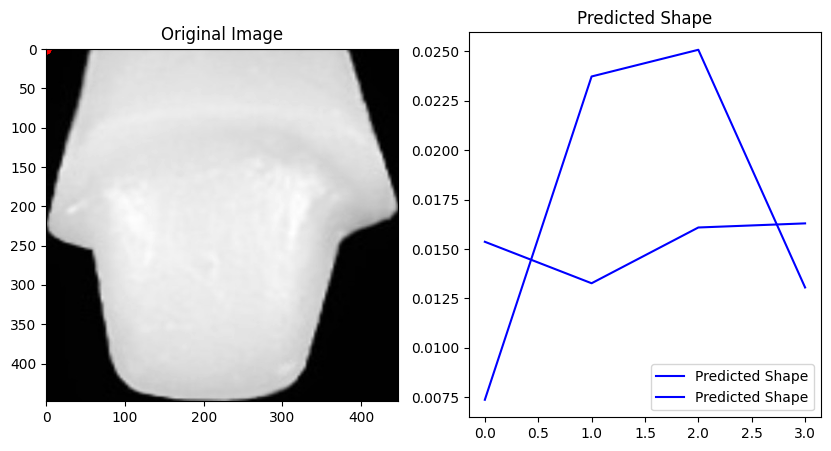

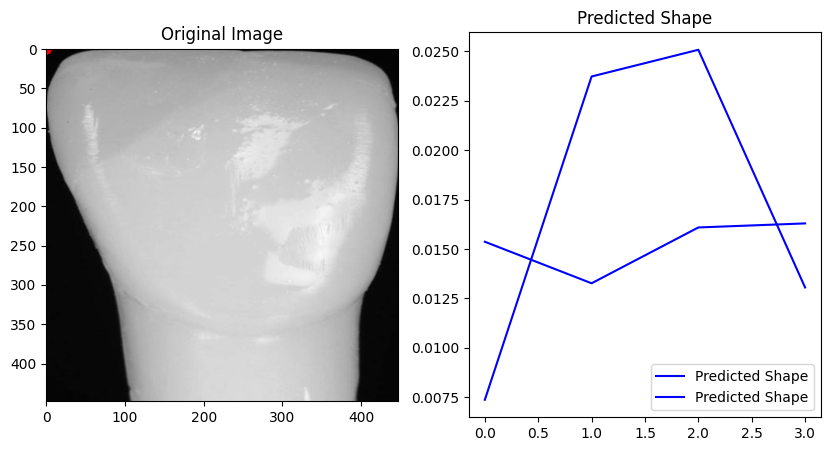

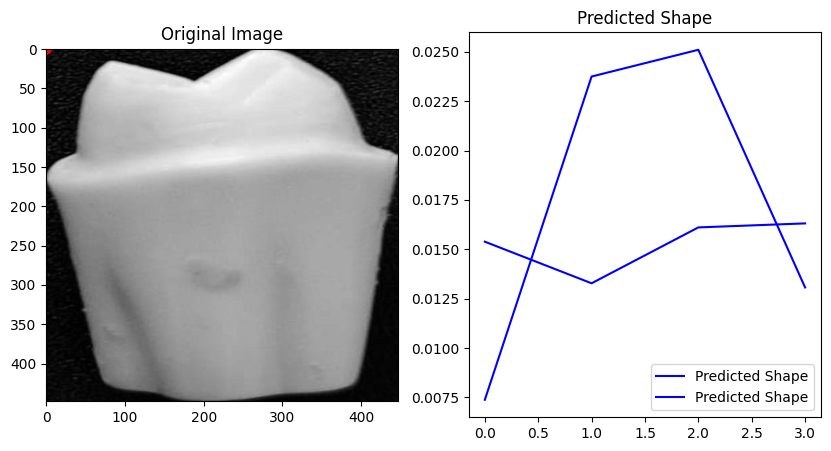

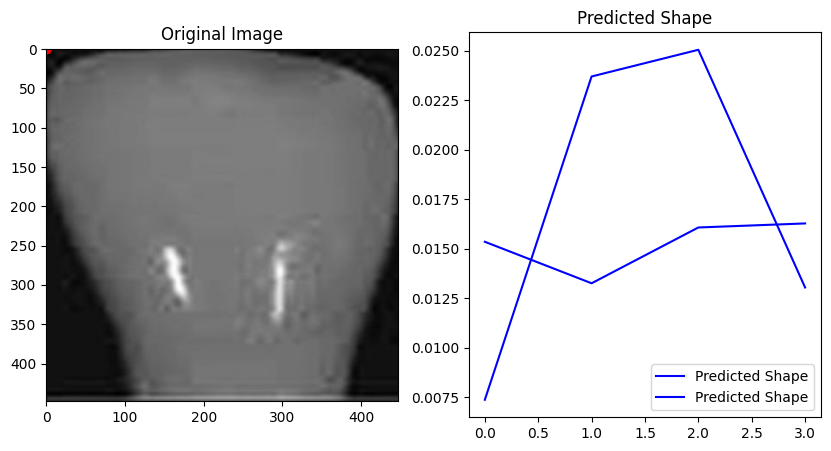

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

def extract_landmarks(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    landmarks = []

    for obj in root.findall('object'):
        name = obj.find('name').text

        # Extract bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Compute the center coordinates of the bounding box
        cx = (xmin + xmax) / 2
        cy = (ymin + ymax) / 2

        # Normalize to range [-1, 1]
        normalized_cx = (2 * cx / 448) - 1
        normalized_cy = (2 * cy / 448) - 1

        landmarks.append([normalized_cx, normalized_cy])

    return landmarks

def load_data(image_dir, annotation_dir):
    images = []
    landmarks = []

    for i in range(48):
        img_path = image_dir + str(i) + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        xml_path = annotation_dir + str(i) + '.xml'
        landmarks_list = extract_landmarks(xml_path)
        landmarks_array = np.array(landmarks_list).transpose((1, 0))  # Convert to NumPy array and transpose

        landmarks.append(landmarks_array)
        images.append(img)

    images = np.array(images)
    landmarks = np.array(landmarks)
    return images, landmarks



def preprocess_data(images, landmarks):
    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    # Assuming landmarks shape is (num_samples, num_landmarks, 2)
    landmarks = landmarks / np.array([448, 448])[:, np.newaxis]  # Broadcasting along the second axis
    landmarks = landmarks.transpose((0, 2, 1))  # Transpose the landmarks

    return images, landmarks


def create_shape_model(num_landmarks):
    inputs = tf.keras.layers.Input(shape=(num_landmarks, 2))
    x = tf.keras.layers.Conv1D(16, kernel_size=1, activation='relu')(inputs)
    x = tf.keras.layers.GlobalMaxPooling1D()(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_landmarks * 2, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((num_landmarks, 2))(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model




def visualize_results(images, true_landmarks, predicted_shapes, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(10, 5))

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        # Display the true landmarks
        plt.scatter(true_landmarks[i][:, 0], true_landmarks[i][:, 1], c='r', marker='o', label='True Landmarks')

        # Display the predicted shapes
        plt.subplot(1, 2, 2)
        plt.plot(predicted_shapes[i], c='b', label='Predicted Shape')
        plt.title('Predicted Shape')

        plt.legend()
        plt.show()

def main():
    image_dir = '/home/est/est/'
    annotation_dir = '/home/est/est/'

    images, landmarks = load_data(image_dir, annotation_dir)
    images, landmarks = preprocess_data(images, landmarks)

    # Set the correct number of landmarks
    num_landmarks = 4

    train_images, test_images, train_landmarks, test_landmarks = train_test_split(
        images, landmarks, test_size=0.2, random_state=42
    )

    model = create_shape_model(num_landmarks)

    history = model.fit(
        train_landmarks, train_landmarks, epochs=100, batch_size=32, validation_data=(test_landmarks, test_landmarks)
    )

    model.save('shape_detection_model.h5')

    # Make predictions on test landmarks
    predicted_landmarks = model.predict(test_landmarks)

    # Visualize the results
    visualize_results(test_images, test_landmarks, predicted_landmarks)
    model.save('shape_detection_model.h5')
if __name__ == '__main__':
    main()


Epoch 1/100
2/2 [==============================] - 9s 2s/step - loss: 0.5916 - val_loss: 0.3715
Epoch 2/100
2/2 [==============================] - 6s 2s/step - loss: 0.3436 - val_loss: 0.2591
Epoch 3/100
2/2 [==============================] - 7s 2s/step - loss: 0.2614 - val_loss: 0.2576
Epoch 4/100
2/2 [==============================] - 6s 2s/step - loss: 0.2596 - val_loss: 0.2587
Epoch 5/100
2/2 [==============================] - 7s 2s/step - loss: 0.2617 - val_loss: 0.2592
Epoch 6/100
2/2 [==============================] - 6s 2s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 7/100
2/2 [==============================] - 7s 2s/step - loss: 0.2619 - val_loss: 0.2592
Epoch 8/100
2/2 [==============================] - 6s 1s/step - loss: 0.2619 - val_loss: 0.2592
Epoch 9/100
2/2 [==============================] - 7s 2s/step - loss: 0.2619 - val_loss: 0.2594
Epoch 10/100
2/2 [==============================] - 6s 2s/step - loss: 0.2617 - val_loss: 0.2636
Epoch 11/100
2/2 [=====================

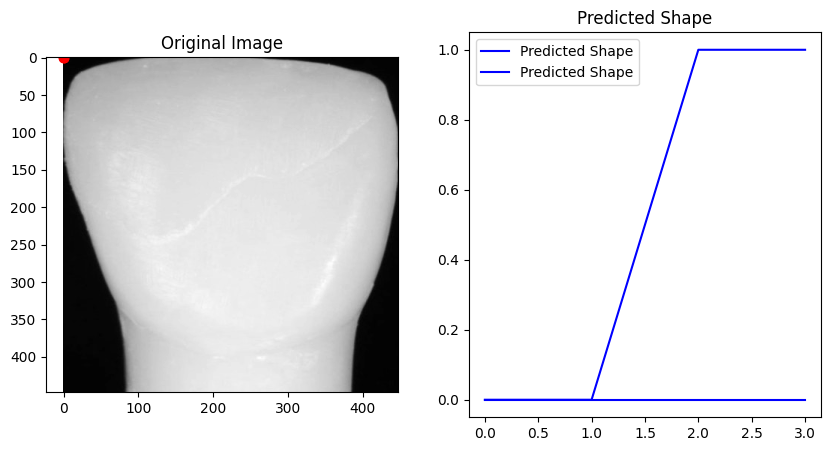

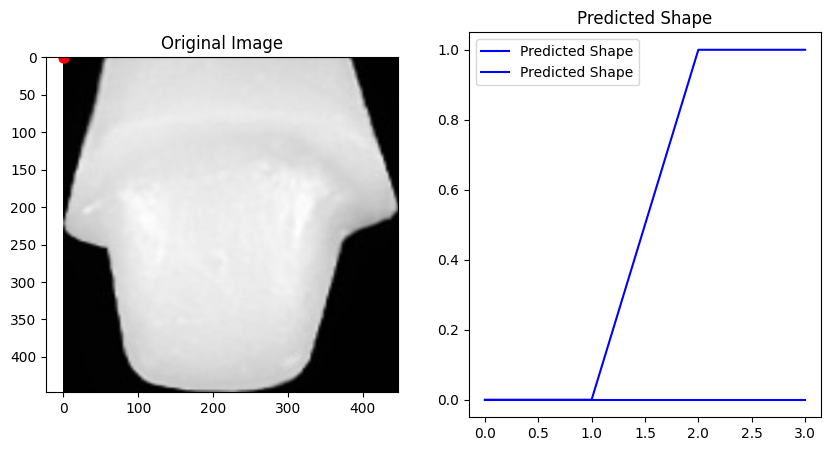

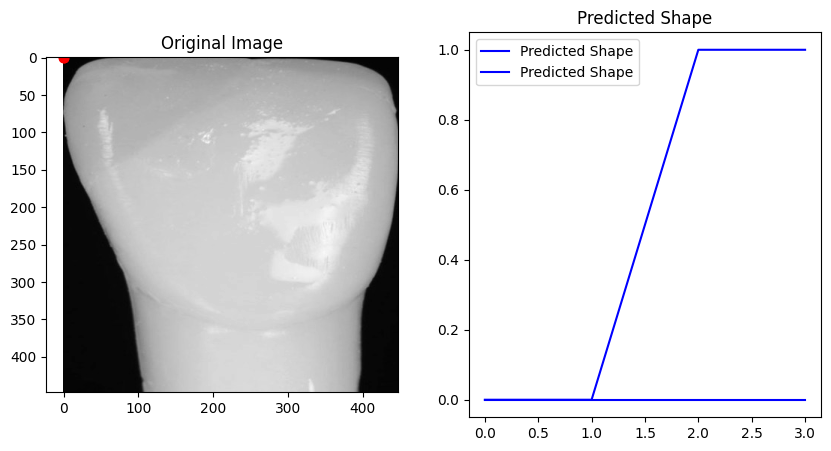

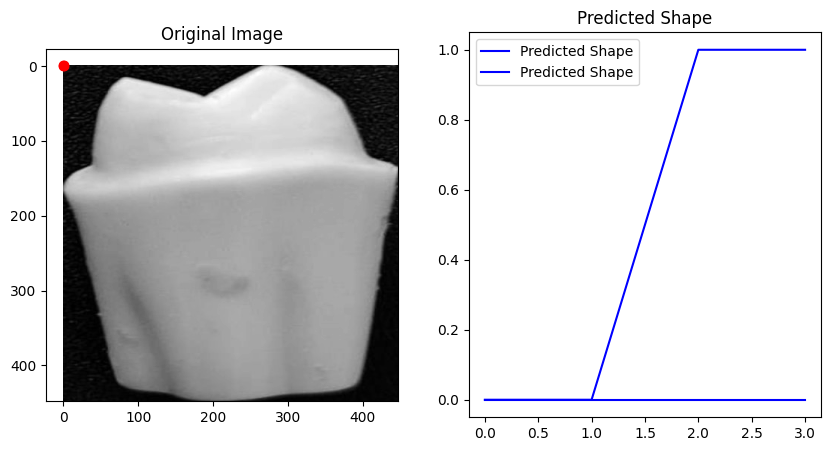

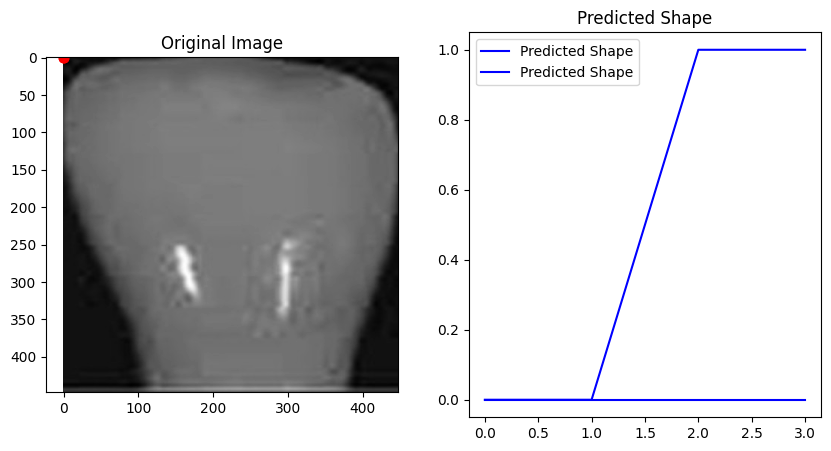

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

def extract_landmarks(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    landmarks = []

    for obj in root.findall('object'):
        name = obj.find('name').text

        # Extract bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Compute the center coordinates of the bounding box
        cx = (xmin + xmax) / 2
        cy = (ymin + ymax) / 2

        # Normalize to range [-1, 1]
        normalized_cx = (2 * cx / 448) - 1
        normalized_cy = (2 * cy / 448) - 1

        landmarks.append([normalized_cx, normalized_cy])

    return landmarks

def load_data(image_dir, annotation_dir):
    images = []
    landmarks = []

    for i in range(48):
        img_path = image_dir + str(i) + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        xml_path = annotation_dir + str(i) + '.xml'
        landmarks_list = extract_landmarks(xml_path)
        landmarks_array = np.array(landmarks_list).transpose((1, 0))  # Convert to NumPy array and transpose

        landmarks.append(landmarks_array)
        images.append(img)

    images = np.array(images)
    landmarks = np.array(landmarks)
    return images, landmarks

def preprocess_data(images, landmarks):
    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    # Assuming landmarks shape is (num_samples, num_landmarks, 2)
    landmarks = landmarks.transpose((0, 2, 1))  # Transpose the landmarks
    return images, landmarks

def create_shape_model(num_landmarks):
    inputs = tf.keras.layers.Input(shape=(448, 448, 1))
    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_landmarks * 2, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((num_landmarks, 2))(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

def visualize_results(images, true_landmarks, predicted_shapes, num_landmarks, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(10, 5))

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        # Display the true landmarks
        plt.scatter(true_landmarks[i][:, 0], true_landmarks[i][:, 1], c='r', marker='o', label='True Landmarks')

        # Display the predicted shapes
        plt.subplot(1, 2, 2)
        plt.plot(predicted_shapes[i], c='b', label='Predicted Shape')
        plt.title('Predicted Shape')

        plt.legend()
        plt.show()

def main():
    image_dir = '/home/est/est/'
    annotation_dir = '/home/est/est/'

    images, landmarks = load_data(image_dir, annotation_dir)
    images, landmarks = preprocess_data(images, landmarks)

    # Set the correct number of landmarks
    num_landmarks = 4

    train_images, test_images, train_landmarks, test_landmarks = train_test_split(
        images, landmarks, test_size=0.2, random_state=42
    )

    model = create_shape_model(num_landmarks)

    history = model.fit(
        train_images, train_landmarks, epochs=100, batch_size=32, validation_data=(test_images, test_landmarks)
    )

    model.save('shape_detection_model.h5')

    # Make predictions on test landmarks
    predicted_landmarks = model.predict(test_images)

    # Visualize the results
    visualize_results(test_images, test_landmarks, predicted_landmarks, num_landmarks)

if __name__ == '__main__':
    main()



In [ ]:
import os
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Load the dataset of images and their corresponding XML files
data_path = '/content/datasetxml/est/'
images, landmarks = [], []
for dirname in os.listdir(data_path):
    for filename in os.listdir(os.path.join(data_path, dirname)):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            image_path = os.path.join(data_path, dirname, filename)
            xml_path = os.path.join(data_path, dirname, filename[:-4] + '.xml')
            image = cv2.imread(image_path)
            image = cv2.resize(image, (96, 96)) # Resize the image to a fixed size
            landmark = []
            tree = ET.parse(xml_path)
            root = tree.getroot()
            for shape in root.iter('shape'):
                if shape.attrib['name'] == 'nose': # Extract the landmarks for the nose
                    x, y = int(shape.attrib['x']), int(shape.attrib['y'])
                    landmark.append([x, y])
            if landmark:
                images.append(image)
                landmarks.append(landmark)
images = np.array(images)
landmarks = np.array(landmarks)

# Preprocess the data
images = images.astype('float32') / 255.0
landmarks = landmarks.astype('float32') / 96.0 # Divide by the image size to normalize the landmarks
landmarks = landmarks.reshape((-1, 2))

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2)) # Output two coordinates for the nose landmark

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
X_train, X_val, y_train, y_val = train_test_split(images, landmarks, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model.save('shape_points_detector.h5')

NotADirectoryError: [Errno 20] Not a directory: '/content/datasetxml/est/17.xml'

In [ ]:
!unzip -q /est.zip -d /content/datasetxml

In [ ]:
!pip install tensorflow

In [ ]:
import os
import cv2
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.model_selection import train_test_split

def extract_coordinates(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    coordinates = []

    for obj in root.findall('object'):
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        coordinates.append([xmin, ymin, xmax, ymax])

    return np.array(coordinates)

def load_data(image_dir, annotation_dir):
    images = []
    coordinates = []

    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_dir, filename)
            xml_path = os.path.join(annotation_dir, filename.replace(".jpg", ".xml"))

            img = cv2.imread(img_path)
            coordinates_list = extract_coordinates(xml_path)

            images.append(img)
            coordinates.append(coordinates_list)

    images = np.array(images)
    coordinates = np.array(coordinates)
    return images, coordinates

# Update with your actual paths
image_dir = '/content/datasetxml/est/'
annotation_dir = '/content/datasetxml/est/'

images, coordinates = load_data(image_dir, annotation_dir)

# Normalize images to [0, 1]
images = images / 255.0

# Split the data into training and testing sets
train_images, test_images, train_coordinates, test_coordinates = train_test_split(
    images, coordinates, test_size=0.2, random_state=42
)


Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 0.5774 - val_loss: 0.2592
Epoch 2/100
2/2 [==============================] - 8s 1s/step - loss: 0.2619 - val_loss: 0.2592
Epoch 3/100
2/2 [==============================] - 6s 1s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 4/100
2/2 [==============================] - 7s 1s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 5/100
2/2 [==============================] - 6s 1s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 6/100
2/2 [==============================] - 7s 2s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 7/100
2/2 [==============================] - 6s 1s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 8/100
2/2 [==============================] - 7s 2s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 9/100
2/2 [==============================] - 6s 2s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 10/100
2/2 [==============================] - 7s 3s/step - loss: 0.2620 - val_loss: 0.2592
Epoch 11/100
2/2 [=====================

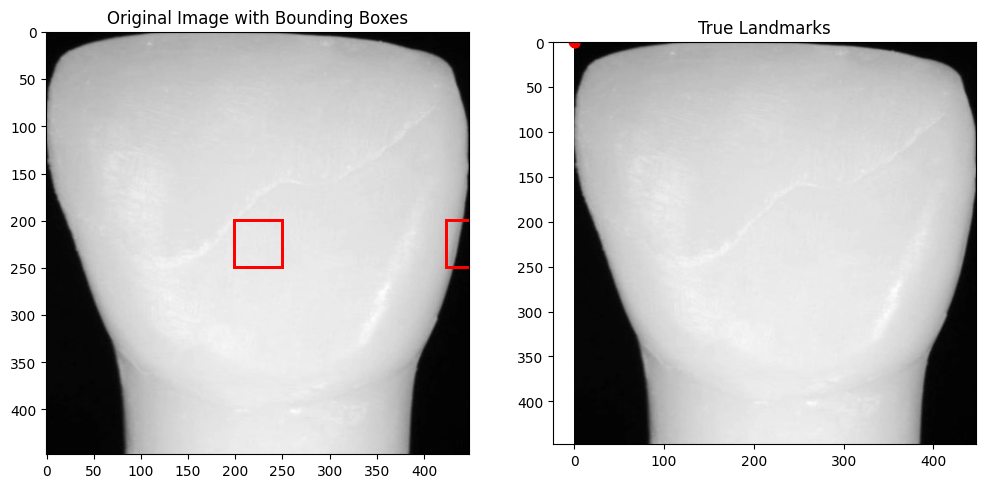

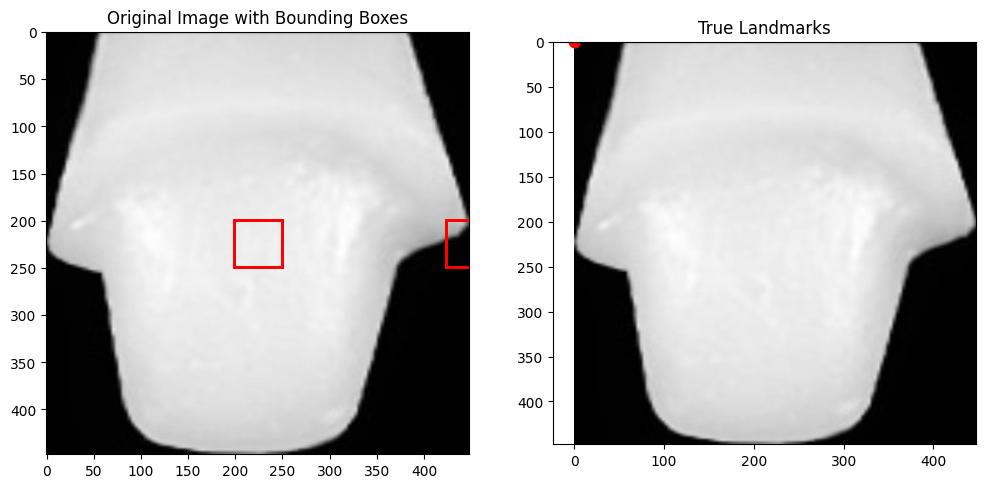

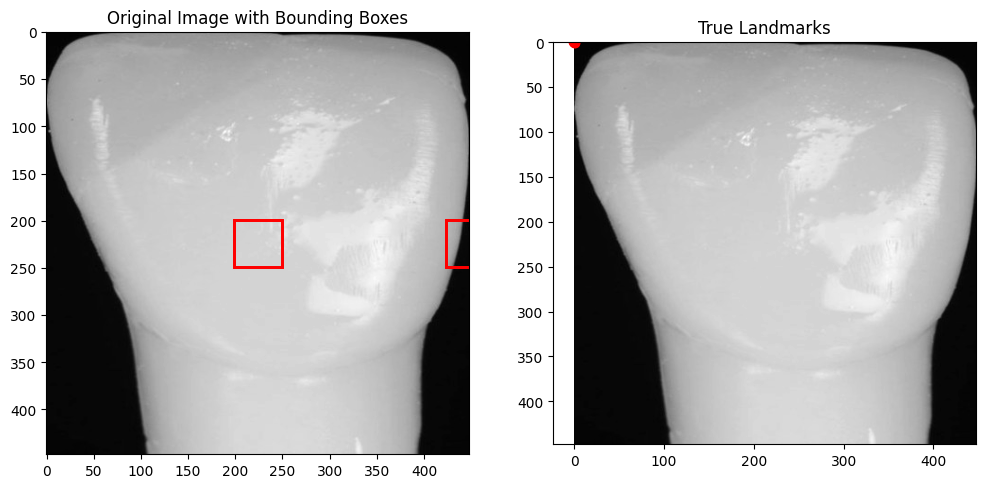

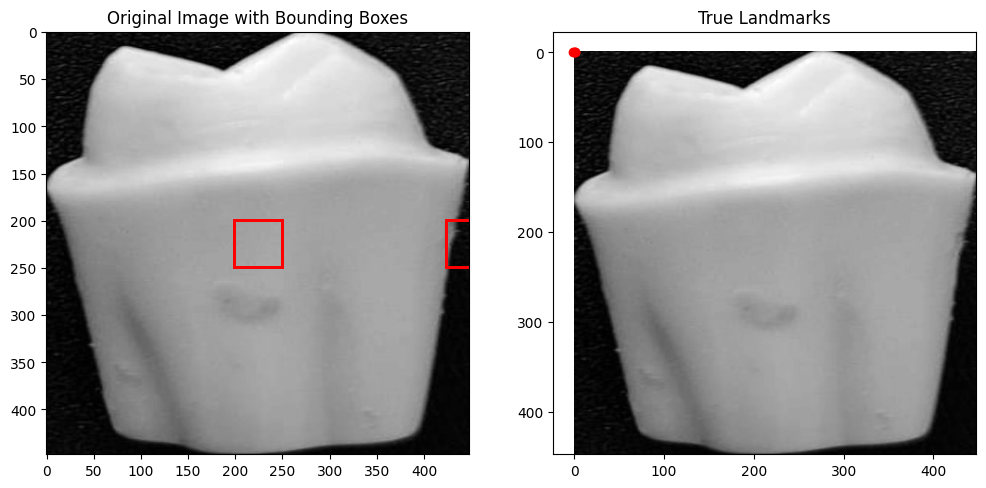

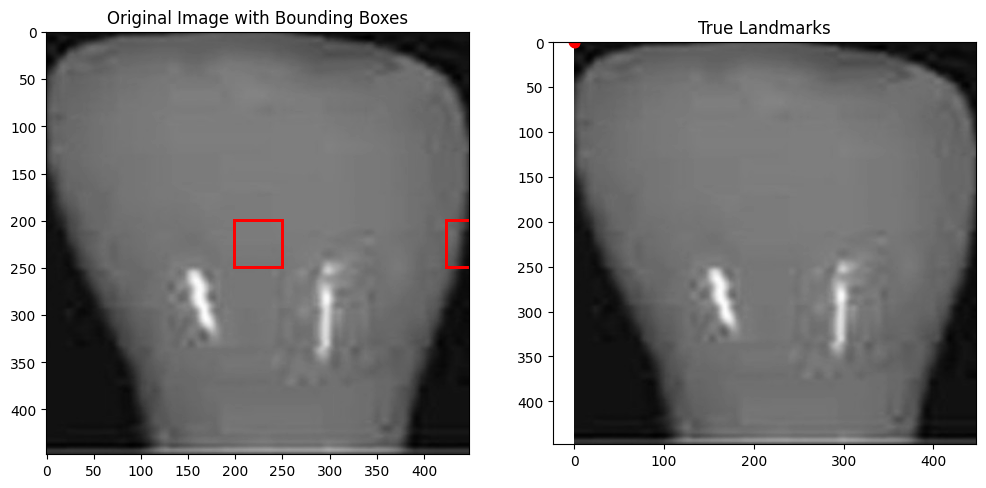

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

def extract_landmarks(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    landmarks = []

    for obj in root.findall('object'):
        name = obj.find('name').text

        # Extract bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Compute the center coordinates of the bounding box
        cx = (xmin + xmax) / 2
        cy = (ymin + ymax) / 2

        # Normalize to range [-1, 1]
        normalized_cx = (2 * cx / 448) - 1
        normalized_cy = (2 * cy / 448) - 1

        landmarks.append([normalized_cx, normalized_cy])

    return landmarks

def load_data(image_dir, annotation_dir):
    images = []
    landmarks = []

    for i in range(48):
        img_path = image_dir + str(i) + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        xml_path = annotation_dir + str(i) + '.xml'
        landmarks_list = extract_landmarks(xml_path)
        landmarks_array = np.array(landmarks_list).transpose((1, 0))  # Convert to NumPy array and transpose

        landmarks.append(landmarks_array)
        images.append(img)

    images = np.array(images)
    landmarks = np.array(landmarks)
    return images, landmarks

def preprocess_data(images, landmarks):
    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    # Assuming landmarks shape is (num_samples, num_landmarks, 2)
    landmarks = landmarks.transpose((0, 2, 1))  # Transpose the landmarks
    return images, landmarks

def create_shape_model(num_landmarks):
    inputs = tf.keras.layers.Input(shape=(448, 448, 1))
    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_landmarks * 2, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((num_landmarks, 2))(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

def denormalize_coordinates(normalized_coordinates, original_width, original_height):
    denormalized_coordinates = (normalized_coordinates + 1) / 2
    denormalized_coordinates[:, 0] *= original_width
    denormalized_coordinates[:, 1] *= original_height
    return denormalized_coordinates

def visualize_results(images, true_landmarks, predicted_shapes, num_landmarks, original_width, original_height, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(12, 6))

        # Display the original image with predicted bounding boxes
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image with Bounding Boxes')

        # Denormalize the predicted coordinates
        predicted_coordinates = denormalize_coordinates(predicted_shapes[i], original_width, original_height)

        # Draw bounding boxes using predicted coordinates
        for j in range(num_landmarks):
            cx, cy = predicted_coordinates[j]
            box_width, box_height = 50, 50  # Adjust based on your dataset

            xmin = int(cx - box_width / 2)
            ymin = int(cy - box_height / 2)
            xmax = int(cx + box_width / 2)
            ymax = int(cy + box_height / 2)

            # Draw the bounding box on the image
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='r', linewidth=2))

        # Display the true landmarks
        plt.subplot(1, 2, 2)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.scatter(true_landmarks[i][:, 0], true_landmarks[i][:, 1], c='r', marker='o', label='True Landmarks')
        plt.title('True Landmarks')

        plt.show()

def main():
    image_dir = '/content/datasetxml/est/'
    annotation_dir = '/content/datasetxml/est/'

    images, landmarks = load_data(image_dir, annotation_dir)
    images, landmarks = preprocess_data(images, landmarks)

    # Set the correct number of landmarks
    num_landmarks = 4

    train_images, test_images, train_landmarks, test_landmarks = train_test_split(
        images, landmarks, test_size=0.2, random_state=42
    )

    model = create_shape_model(num_landmarks)

    history = model.fit(
        train_images, train_landmarks, epochs=100, batch_size=32, validation_data=(test_images, test_landmarks)
    )

    model.save('shape_detection_model.h5')

    # Make predictions on test landmarks
    predicted_landmarks = model.predict(test_images)

    # Visualize the results
    visualize_results(test_images, test_landmarks, predicted_landmarks, num_landmarks, images.shape[2], images.shape[1])

if __name__ == '__main__':
    main()


Epoch 1/100
2/2 [==============================] - 11s 2s/step - loss: 66921.4375 - val_loss: 69219.7891
Epoch 2/100
2/2 [==============================] - 6s 2s/step - loss: 66784.1016 - val_loss: 69183.1172
Epoch 3/100
2/2 [==============================] - 8s 2s/step - loss: 66753.2734 - val_loss: 69182.6641
Epoch 4/100
2/2 [==============================] - 6s 2s/step - loss: 66752.9375 - val_loss: 69182.6406
Epoch 5/100
2/2 [==============================] - 8s 2s/step - loss: 66752.8984 - val_loss: 69182.6406
Epoch 6/100
2/2 [==============================] - 6s 2s/step - loss: 66752.8984 - val_loss: 69182.6406
Epoch 7/100
2/2 [==============================] - 8s 2s/step - loss: 66752.9062 - val_loss: 69182.6406
Epoch 8/100
2/2 [==============================] - 6s 2s/step - loss: 66752.8984 - val_loss: 69182.6406
Epoch 9/100
2/2 [==============================] - 8s 2s/step - loss: 66752.9062 - val_loss: 69182.6406
Epoch 10/100
2/2 [==============================] - 6s 1s/step 

1/1 [==============================] - 0s 489ms/step


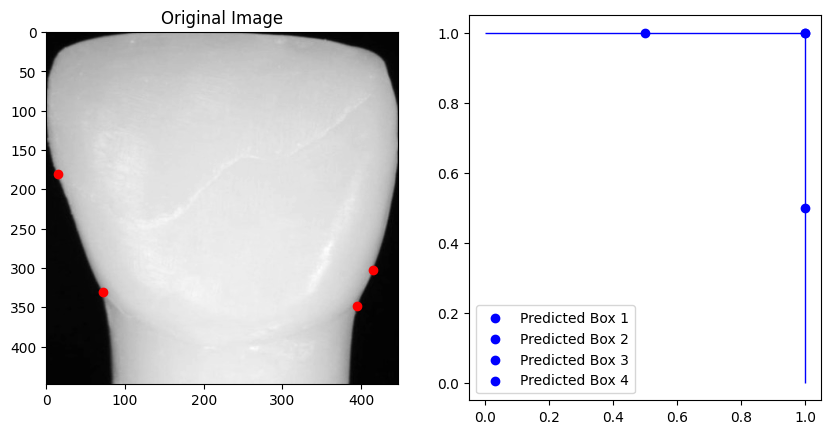

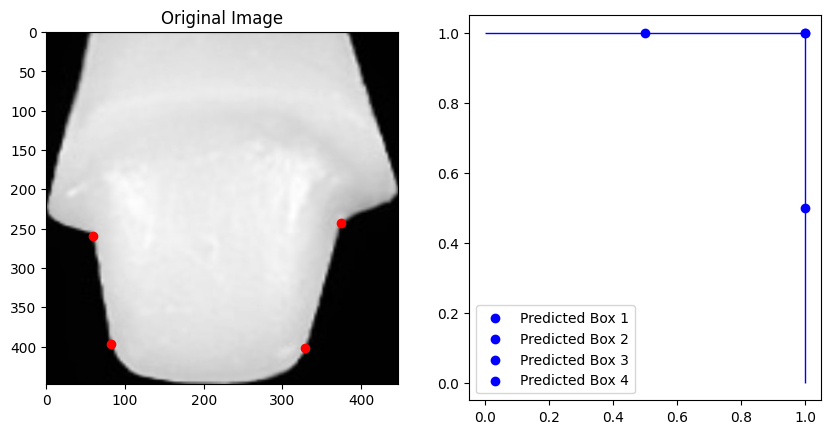

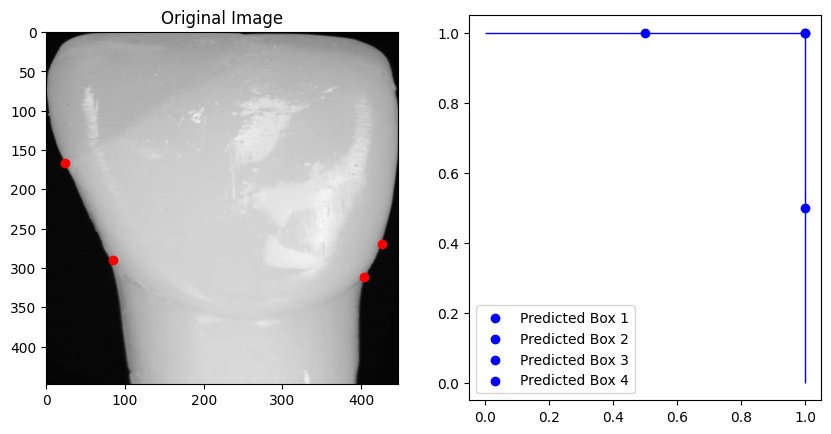

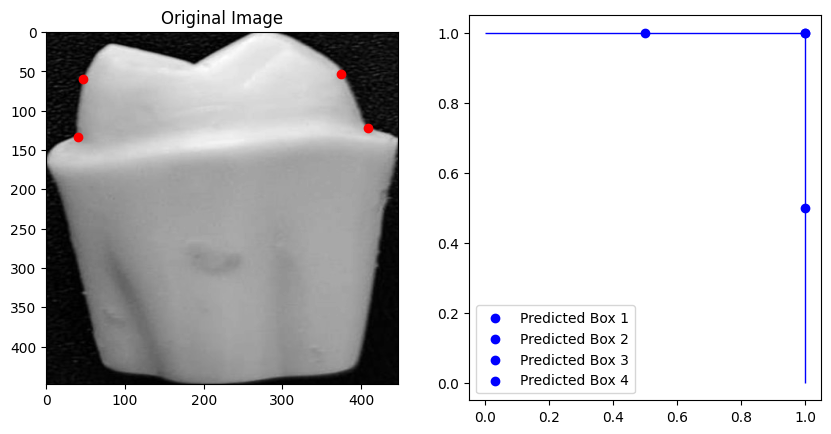

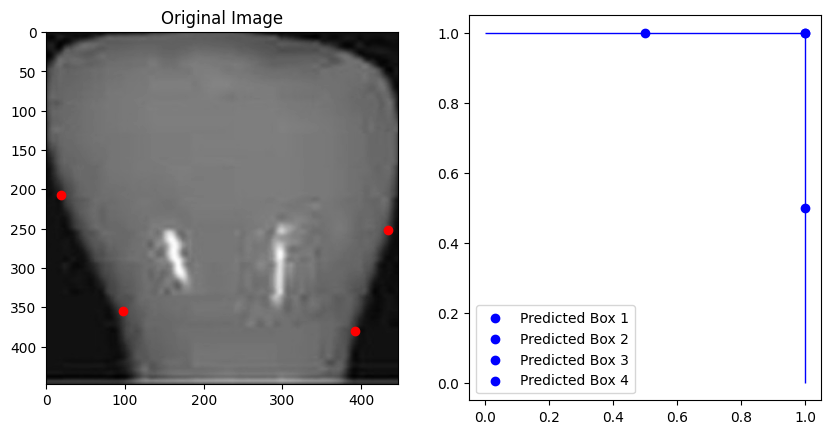

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

def extract_coordinates(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    coordinates = []

    for obj in root.findall('object'):
        # Extract bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        coordinates.append([xmin, ymin, xmax, ymax])

    return coordinates

def load_data(image_dir, annotation_dir):
    images = []
    coordinates = []

    for i in range(48):
        img_path = image_dir + str(i) + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        xml_path = annotation_dir + str(i) + '.xml'
        coordinates_list = extract_coordinates(xml_path)
        coordinates_array = np.array(coordinates_list)  # Convert to NumPy array

        coordinates.append(coordinates_array)
        images.append(img)

    images = np.array(images)
    coordinates = np.array(coordinates)
    return images, coordinates

def preprocess_data(images, coordinates):
    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    return images, coordinates

def create_coordinate_model(num_objects):
    inputs = tf.keras.layers.Input(shape=(448, 448, 1))
    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_objects * 4, activation='sigmoid')(x)
    outputs = tf.keras.layers.Reshape((num_objects, 4))(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

def visualize_results(images, true_coordinates, predicted_coordinates, num_objects, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(10, 5))

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        # Display the true bounding boxes
        true_coords = true_coordinates[i]
        for j in range(num_objects):
            xmin, ymin, xmax, ymax = true_coords[j]
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
            plt.scatter((xmin + xmax) / 2, (ymin + ymax) / 2, c='r', marker='o', label=f'True Box {j + 1}')

        # Display the predicted bounding boxes
        plt.subplot(1, 2, 2)
        pred_coords = predicted_coordinates[i]
        for j in range(num_objects):
            xmin, ymin, xmax, ymax = pred_coords[j]
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='b', facecolor='none')
            plt.gca().add_patch(rect)
            plt.scatter((xmin + xmax) / 2, (ymin + ymax) / 2, c='b', marker='o', label=f'Predicted Box {j + 1}')

        plt.legend()
        plt.show()

def main():
    image_dir = '/content/datasetxml/est/'
    annotation_dir = '/content/datasetxml/est/'

    images, coordinates = load_data(image_dir, annotation_dir)
    images, coordinates = preprocess_data(images, coordinates)

    # Set the correct number of objects (adjust as needed)
    num_objects = 4

    train_images, test_images, train_coordinates, test_coordinates = train_test_split(
        images, coordinates, test_size=0.2, random_state=42
    )

    model = create_coordinate_model(num_objects)

    history = model.fit(
        train_images, train_coordinates, epochs=100, batch_size=32, validation_data=(test_images, test_coordinates)
    )

    model.save('bounding_box_model.h5')

    # Make predictions on test coordinates
    predicted_coordinates = model.predict(test_images)

    # Visualize the results
    visualize_results(test_images, test_coordinates, predicted_coordinates, num_objects)

if __name__ == '__main__':
    main()



Epoch 1/100
2/2 [==============================] - 11s 2s/step - loss: 65096.8438 - val_loss: 46191.8672
Epoch 2/100
2/2 [==============================] - 8s 2s/step - loss: 43004.2695 - val_loss: 31229.2344
Epoch 3/100
2/2 [==============================] - 6s 2s/step - loss: 30749.3086 - val_loss: 28068.8242
Epoch 4/100
2/2 [==============================] - 8s 2s/step - loss: 28393.0781 - val_loss: 20167.9980
Epoch 5/100
2/2 [==============================] - 6s 2s/step - loss: 20114.5000 - val_loss: 14896.2783
Epoch 6/100
2/2 [==============================] - 8s 2s/step - loss: 14375.8916 - val_loss: 13006.7012
Epoch 7/100
2/2 [==============================] - 6s 2s/step - loss: 12051.8906 - val_loss: 11562.5381
Epoch 8/100
2/2 [==============================] - 8s 2s/step - loss: 10587.8281 - val_loss: 10318.5332
Epoch 9/100
2/2 [==============================] - 6s 2s/step - loss: 9709.6348 - val_loss: 9996.0303
Epoch 10/100
2/2 [==============================] - 8s 2s/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 527ms/step


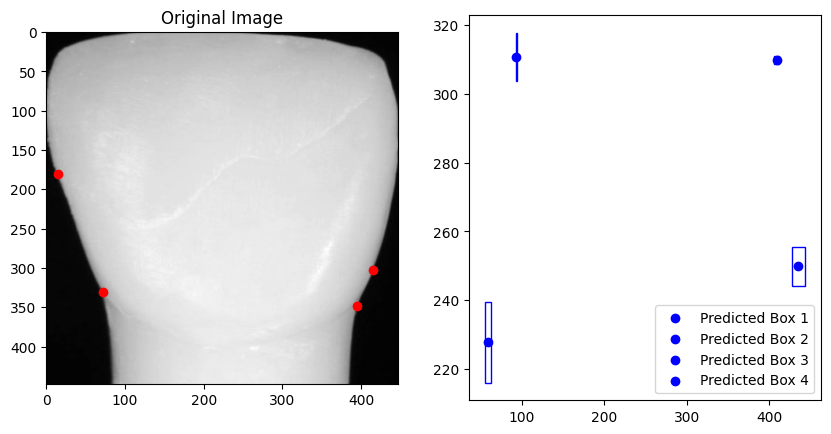

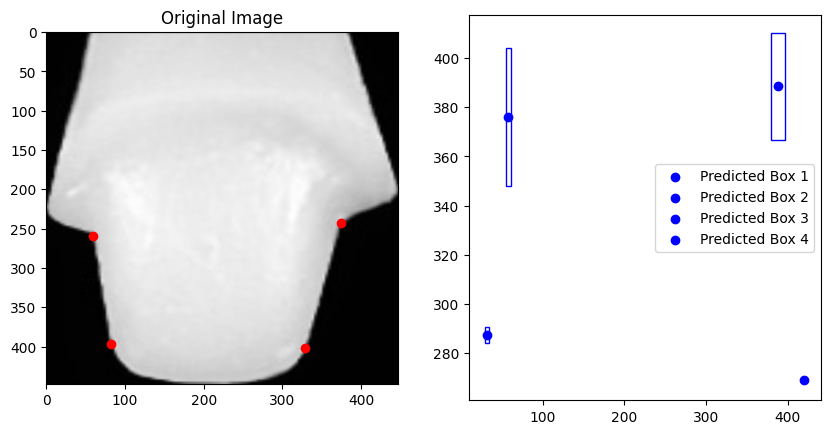

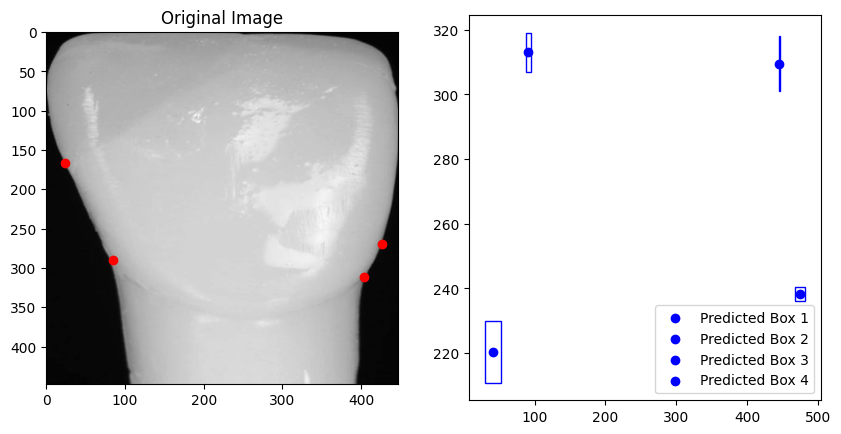

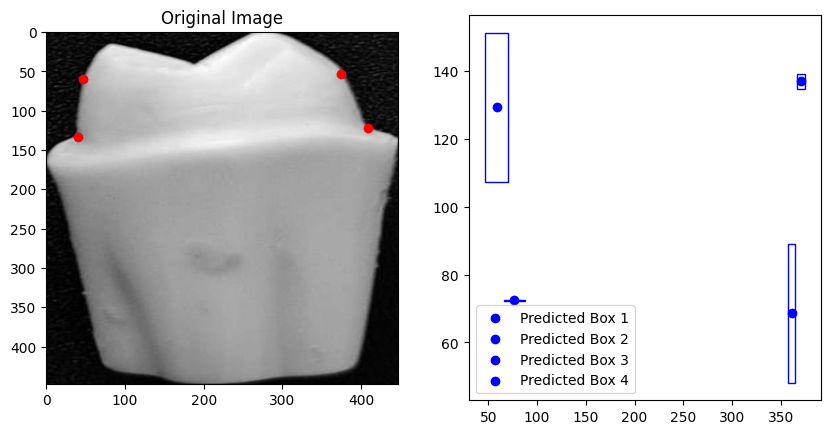

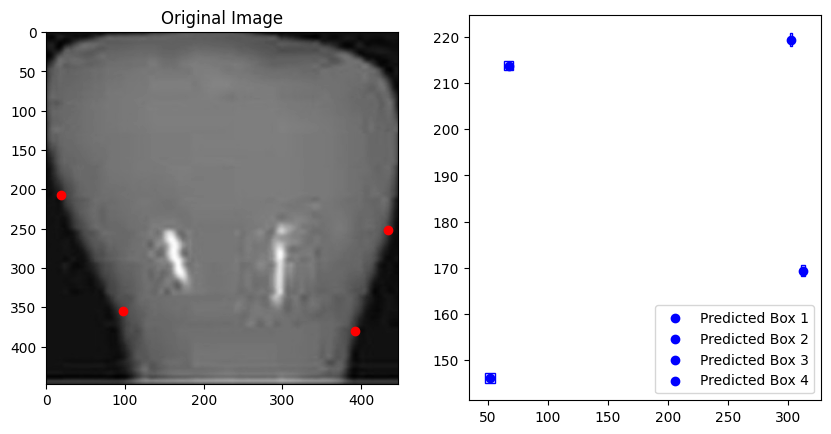

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
!unzip -q /est.zip -d /content/datasetxml
def extract_coordinates(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    coordinates = []

    for obj in root.findall('object'):
        # Extract bounding box coordinates
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        coordinates.append([xmin, ymin, xmax, ymax])

    return coordinates

def load_data(image_dir, annotation_dir):
    images = []
    coordinates = []

    for i in range(48):
        img_path = image_dir + str(i) + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        xml_path = annotation_dir + str(i) + '.xml'
        coordinates_list = extract_coordinates(xml_path)
        coordinates_array = np.array(coordinates_list)  # Convert to NumPy array

        coordinates.append(coordinates_array)
        images.append(img)

    images = np.array(images)
    coordinates = np.array(coordinates)
    return images, coordinates

def preprocess_data(images, coordinates):
    images = (images - np.min(images)) / (np.max(images) - np.min(images))

    return images, coordinates

def create_coordinate_model(num_objects):
    inputs = tf.keras.layers.Input(shape=(448, 448, 1))
    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_objects * 4, activation='linear')(x)
    outputs = tf.keras.layers.Reshape((num_objects, 4))(outputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

def visualize_results(images, true_coordinates, predicted_coordinates, num_objects, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(10, 5))

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        # Display the true bounding boxes
        true_coords = true_coordinates[i]
        for j in range(num_objects):
            xmin, ymin, xmax, ymax = true_coords[j]
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
            plt.scatter((xmin + xmax) / 2, (ymin + ymax) / 2, c='r', marker='o', label=f'True Box {j + 1}')

        # Display the predicted bounding boxes
        plt.subplot(1, 2, 2)
        pred_coords = predicted_coordinates[i]
        for j in range(num_objects):
            xmin, ymin, xmax, ymax = pred_coords[j]
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='b', facecolor='none')
            plt.gca().add_patch(rect)
            plt.scatter((xmin + xmax) / 2, (ymin + ymax) / 2, c='b', marker='o', label=f'Predicted Box {j + 1}')

        plt.legend()
        plt.show()

def main():
    image_dir = '/content/datasetxml/est/'
    annotation_dir = '/content/datasetxml/est/'

    images, coordinates = load_data(image_dir, annotation_dir)
    images, coordinates = preprocess_data(images, coordinates)

    # Set the correct number of objects (adjust as needed)
    num_objects = 4

    train_images, test_images, train_coordinates, test_coordinates = train_test_split(
        images, coordinates, test_size=0.2, random_state=42
    )

    model = create_coordinate_model(num_objects)

    history = model.fit(
        train_images, train_coordinates, epochs=100, batch_size=32, validation_data=(test_images, test_coordinates)
    )

    model.save('bounding_box_model.h5')

    # Make predictions on test coordinates
    predicted_coordinates = model.predict(test_images)

    # Visualize the results
    visualize_results(test_images, test_coordinates, predicted_coordinates, num_objects)

if __name__ == '__main__':
    main()


Epoch 1/100
2/2 [==============================] - 9s 3s/step - loss: 65309.6055 - val_loss: 47449.1914
Epoch 2/100
2/2 [==============================] - 6s 1s/step - loss: 43956.6992 - val_loss: 24902.0938
Epoch 3/100
2/2 [==============================] - 7s 3s/step - loss: 22853.7363 - val_loss: 15596.8418
Epoch 4/100
2/2 [==============================] - 6s 1s/step - loss: 16248.3682 - val_loss: 16434.2539
Epoch 5/100
2/2 [==============================] - 7s 2s/step - loss: 16876.8906 - val_loss: 10971.5107
Epoch 6/100
2/2 [==============================] - 7s 1s/step - loss: 10831.8711 - val_loss: 8017.0171
Epoch 7/100
2/2 [==============================] - 6s 2s/step - loss: 7565.9546 - val_loss: 8765.4717
Epoch 8/100
2/2 [==============================] - 7s 2s/step - loss: 8265.6943 - val_loss: 9708.2148
Epoch 9/100
2/2 [==============================] - 6s 1s/step - loss: 8867.6748 - val_loss: 8993.4365
Epoch 10/100
2/2 [==============================] - 7s 1s/step - loss: 

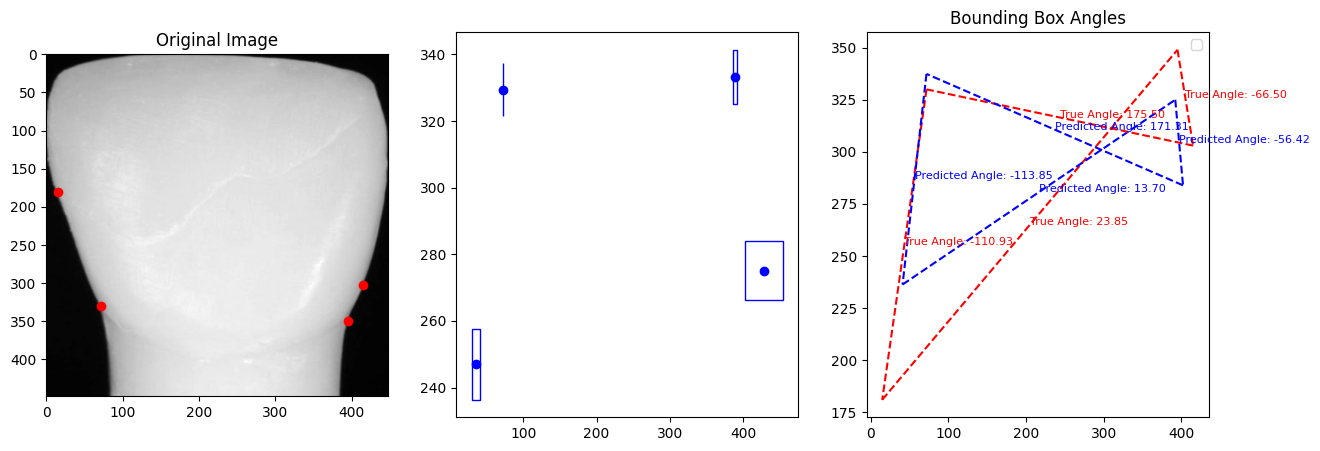

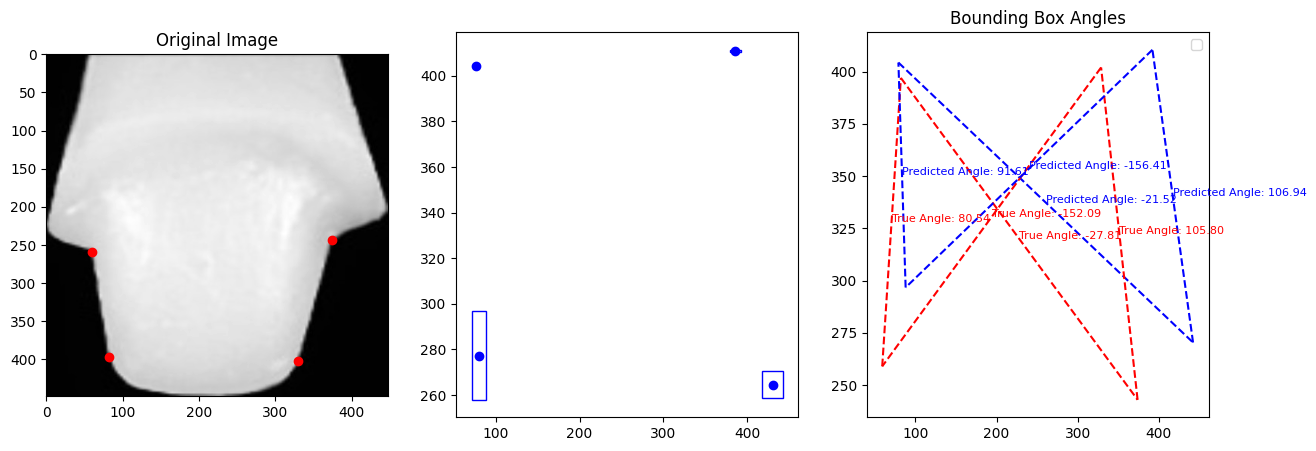

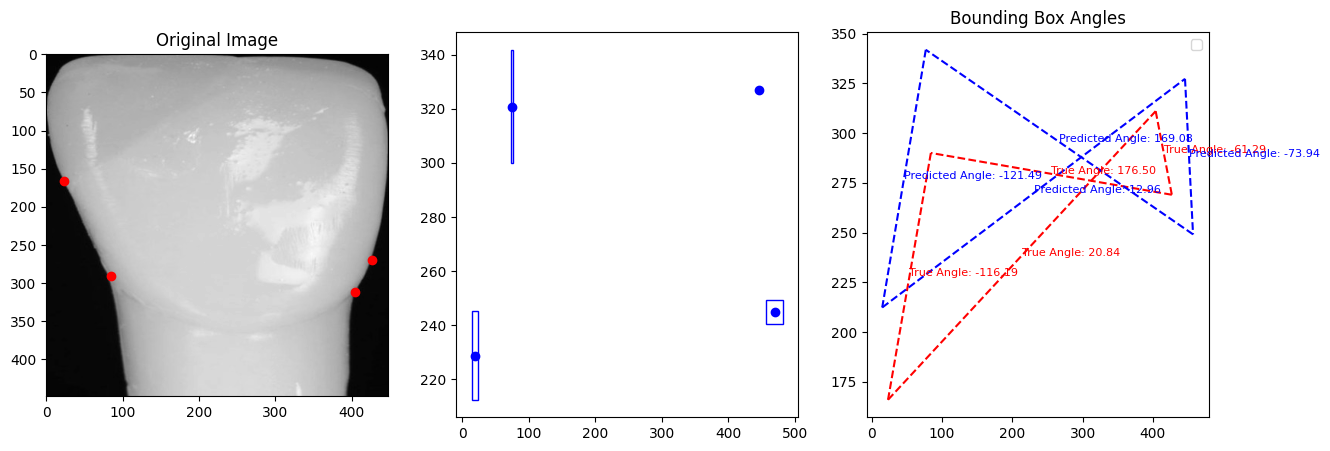

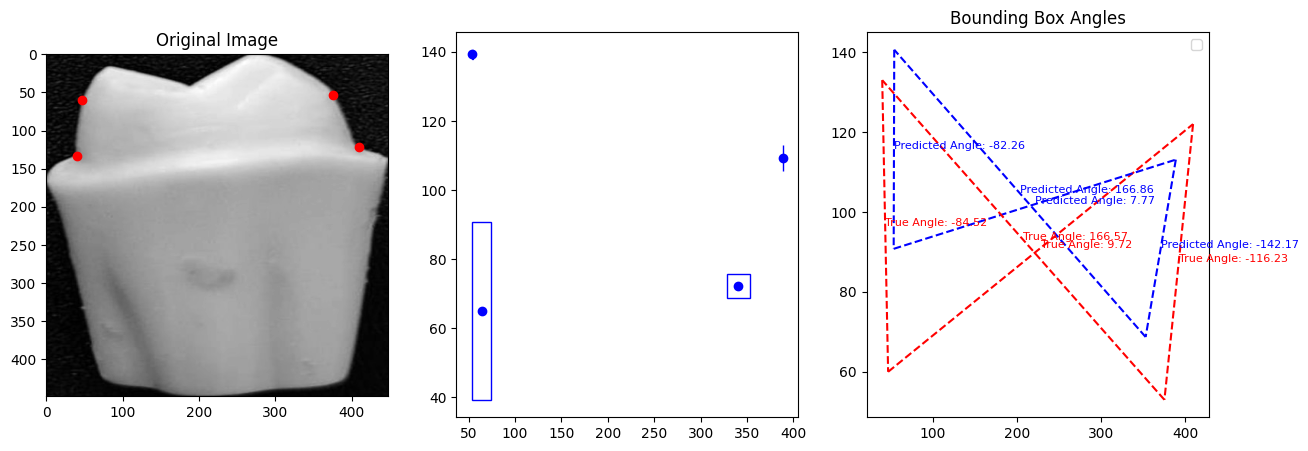

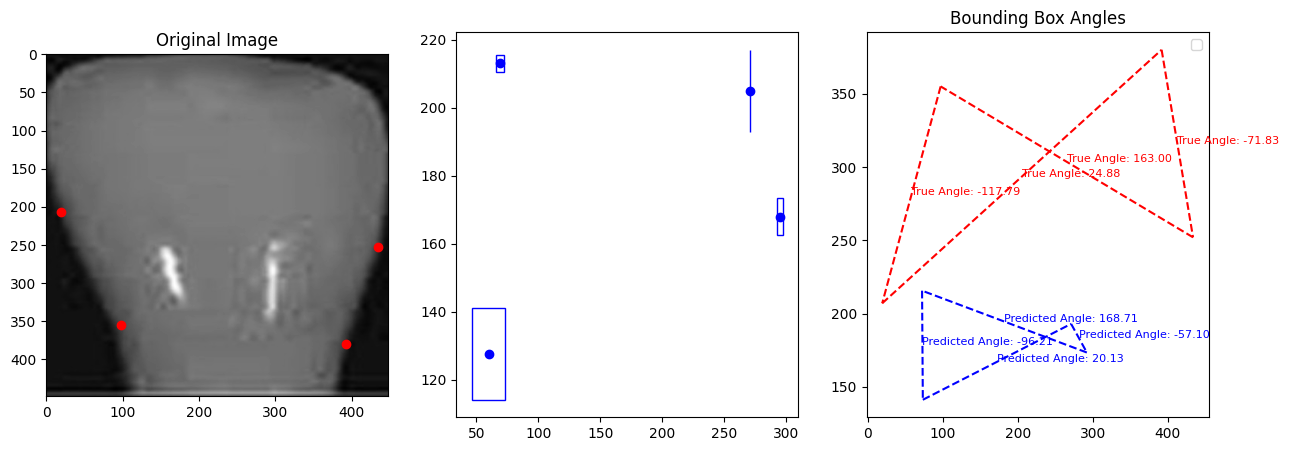

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def calculate_angle(coord1, coord2):
    x1, y1 = (coord1[0] + coord1[2]) / 2, (coord1[1] + coord1[3]) / 2
    x2, y2 = (coord2[0] + coord2[2]) / 2, (coord2[1] + coord2[3]) / 2
    dx, dy = x2 - x1, y2 - y1
    angle = math.degrees(math.atan2(dy, dx))
    return angle

def visualize_results(images, true_coordinates, predicted_coordinates, num_objects, num_visualizations=5):
    for i in range(num_visualizations):
        plt.figure(figsize=(15, 5))

        # Display the original image
        plt.subplot(1, 3, 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title('Original Image')

        # Display the true bounding boxes
        true_coords = true_coordinates[i]
        for j in range(num_objects):
            xmin, ymin, xmax, ymax = true_coords[j]
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)
            plt.scatter((xmin + xmax) / 2, (ymin + ymax) / 2, c='r', marker='o', label=f'True Box {j + 1}')

        # Display the predicted bounding boxes
        plt.subplot(1, 3, 2)
        pred_coords = predicted_coordinates[i]
        for j in range(num_objects):
            xmin, ymin, xmax, ymax = pred_coords[j]
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='b', facecolor='none')
            plt.gca().add_patch(rect)
            plt.scatter((xmin + xmax) / 2, (ymin + ymax) / 2, c='b', marker='o', label=f'Predicted Box {j + 1}')

        # Draw lines and calculate angles
        plt.subplot(1, 3, 3)
        for j in range(num_objects):
            true_angle = calculate_angle(true_coords[j], true_coords[(j + 1) % num_objects])
            pred_angle = calculate_angle(pred_coords[j], pred_coords[(j + 1) % num_objects])

            plt.plot([true_coords[j][0], true_coords[(j + 1) % num_objects][0]],
                     [true_coords[j][1], true_coords[(j + 1) % num_objects][1]], c='r', linestyle='dashed')
            plt.plot([pred_coords[j][0], pred_coords[(j + 1) % num_objects][0]],
                     [pred_coords[j][1], pred_coords[(j + 1) % num_objects][1]], c='b', linestyle='dashed')

            plt.text((true_coords[j][0] + true_coords[(j + 1) % num_objects][0]) / 2,
                     (true_coords[j][1] + true_coords[(j + 1) % num_objects][1]) / 2,
                     f'True Angle: {true_angle:.2f}', fontsize=8, color='r')

            plt.text((pred_coords[j][0] + pred_coords[(j + 1) % num_objects][0]) / 2,
                     (pred_coords[j][1] + pred_coords[(j + 1) % num_objects][1]) / 2,
                     f'Predicted Angle: {pred_angle:.2f}', fontsize=8, color='b')

        plt.title('Bounding Box Angles')
        plt.legend()
        plt.show()

def main():
    image_dir = '/content/datasetxml/est/'
    annotation_dir = '/content/datasetxml/est/'

    images, coordinates = load_data(image_dir, annotation_dir)
    images, coordinates = preprocess_data(images, coordinates)

    # Set the correct number of objects (adjust as needed)
    num_objects = 4

    train_images, test_images, train_coordinates, test_coordinates = train_test_split(
        images, coordinates, test_size=0.2, random_state=42
    )

    model = create_coordinate_model(num_objects)

    history = model.fit(
        train_images, train_coordinates, epochs=100, batch_size=32, validation_data=(test_images, test_coordinates)
    )

    model.save('bounding_box_model.h5')

    # Make predictions on test coordinates
    predicted_coordinates = model.predict(test_images)

    # Visualize the results
    visualize_results(test_images, test_coordinates, predicted_coordinates, num_objects)

if __name__ == '__main__':
    main()

In [ ]:

import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f]

layer_names = net.getUnconnectedOutLayersNames()

# Load image
image_path = '/content/datasetxml/est/17.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)
height, width, _ = image.shape

# Detect objects
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(layer_names)

# Process results
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Non-maximum suppression to remove duplicates
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes on the image
for i in indices:
    i = i[0]
    box = boxes[i]
    x, y, w, h = box
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the result
cv2.imshow("Object Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) /io/opencv/modules/dnn/src/darknet/darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'readNetFromDarknet'
